# Page View Time Series Calculator
### For an explanation of this project, please visit : [FCC](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer)

In [136]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ['date'], index_col = ['date'] )

# Clean data
bottom =df['value'].quantile(0.025)
top = df['value'].quantile(0.975)

df = df[(df['value'] <= top) & (df['value'] >= bottom)]


def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(16, 5), dpi= 100)
    plt.plot(df.index, df.value, color='tab:red')
    plt.gca().set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019', xlabel='Date', ylabel= 'Page Views')
    # plt.show()

    # Save image and return fig (don't change this part)
    # fig.savefig('line_plot.png')
    # return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar = df_bar.reset_index()
    
    df_bar['year'] = [df_bar['date'][i].year for i in range(df_bar.shape[0])]
    df_bar['months'] = [d.strftime('%B') for d in df_bar.date]
    df_bar.drop(columns=['date'], inplace=True)
    df_group = df_bar.groupby(['year','months']).mean()
    df_group.reset_index(inplace= True)
    
    new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    df_group['months'] = pd.Categorical(df_group['months'], categories=new_order, ordered=True)
    df_group.sort_values(by='months', inplace=True) 

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(13,7), dpi=100 )
    sns.barplot( data = df_group, x = 'year', y = 'value', hue = 'months', palette= 'bright' )
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    ax.legend(loc='upper left', title='Months')


    # Save image and return fig (don't change this part)
    # fig.savefig('bar_plot.png')
    # return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

    df_box['month'] = pd.Categorical(df_box['month'], categories=months, ordered=True)
    df_box.sort_values(by='month', inplace=True) 
    
    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1,2, figsize=(21,7), dpi=100 )
    sns.boxplot(data = df_box , x = 'year', y='value', ax = axes[0])
    sns.boxplot(data = df_box, x = 'month', y='value',ax = axes[1])

    axes[0].set_title('Year-wise Box Plot (Trend)', fontweight="semibold");
    axes[1].set_title('Month-wise Box Plot (Seasonality)', fontweight="bold");

    axes[0].set_ylim(0, 200000)
    axes[1].set_ylim(0, 200000)
    
    axes[0].set_yticks([0, 20000, 40000, 60000, 80000, 100000, 120000,140000,160000,180000 ,200000])
    axes[1].set_yticks([0, 20000, 40000, 60000, 80000, 100000, 120000,140000,160000,180000 ,200000])


    axes[0].set_ylabel('Page Views', fontsize = 'large');
    axes[1].set_ylabel('Page Views', fontsize = 'large');

    axes[0].set_xlabel('Year', fontsize = 'large');
    axes[1].set_xlabel('Month', fontsize = 'large');





    # Save image and return fig (don't change this part)
    # fig.savefig('box_plot.png')
    # return fig


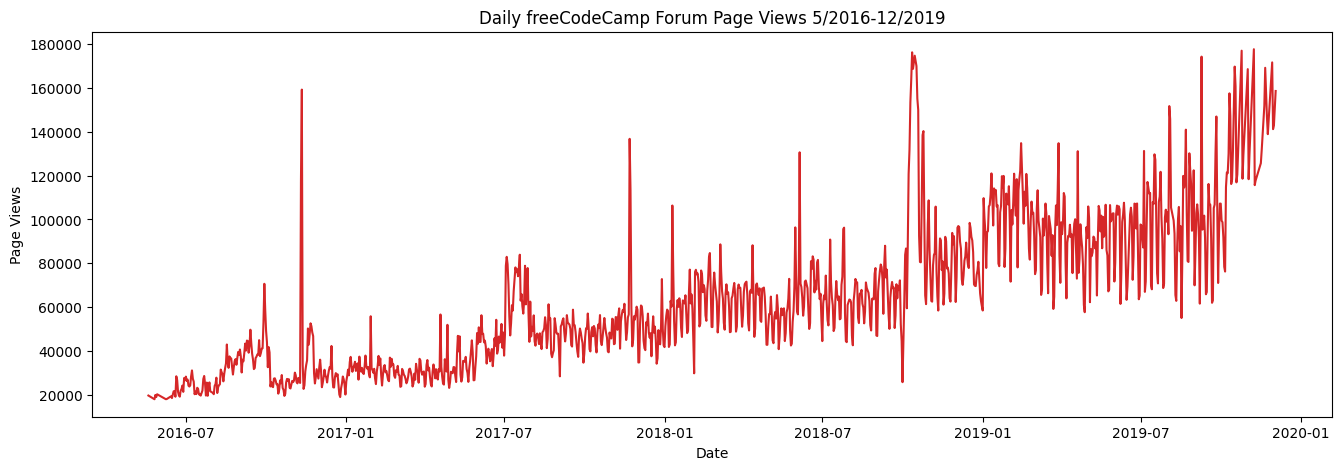

In [137]:
draw_line_plot()

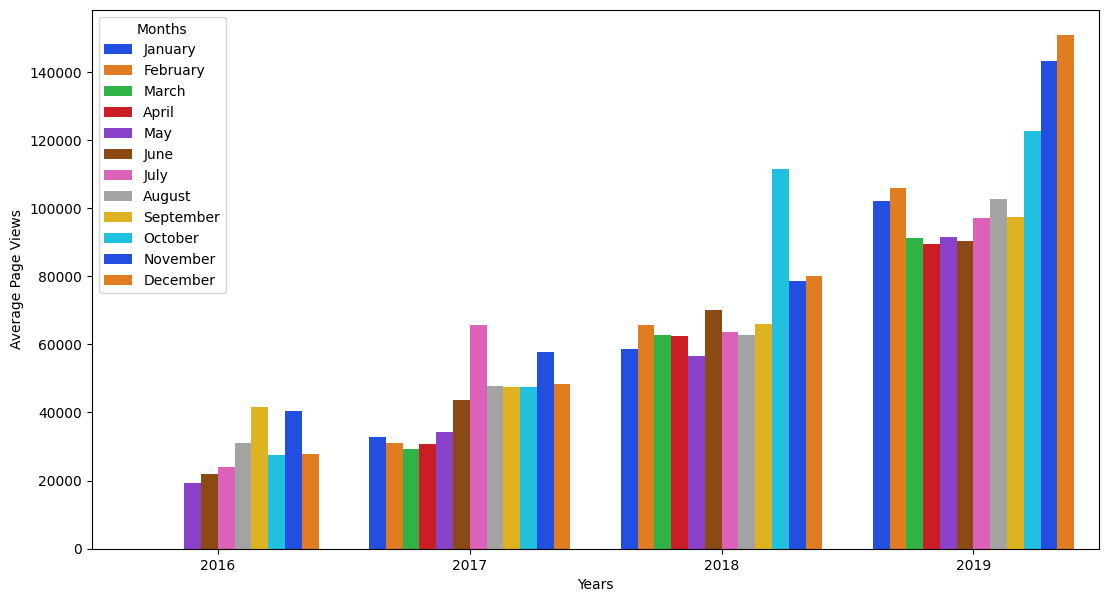

In [138]:
draw_bar_plot()

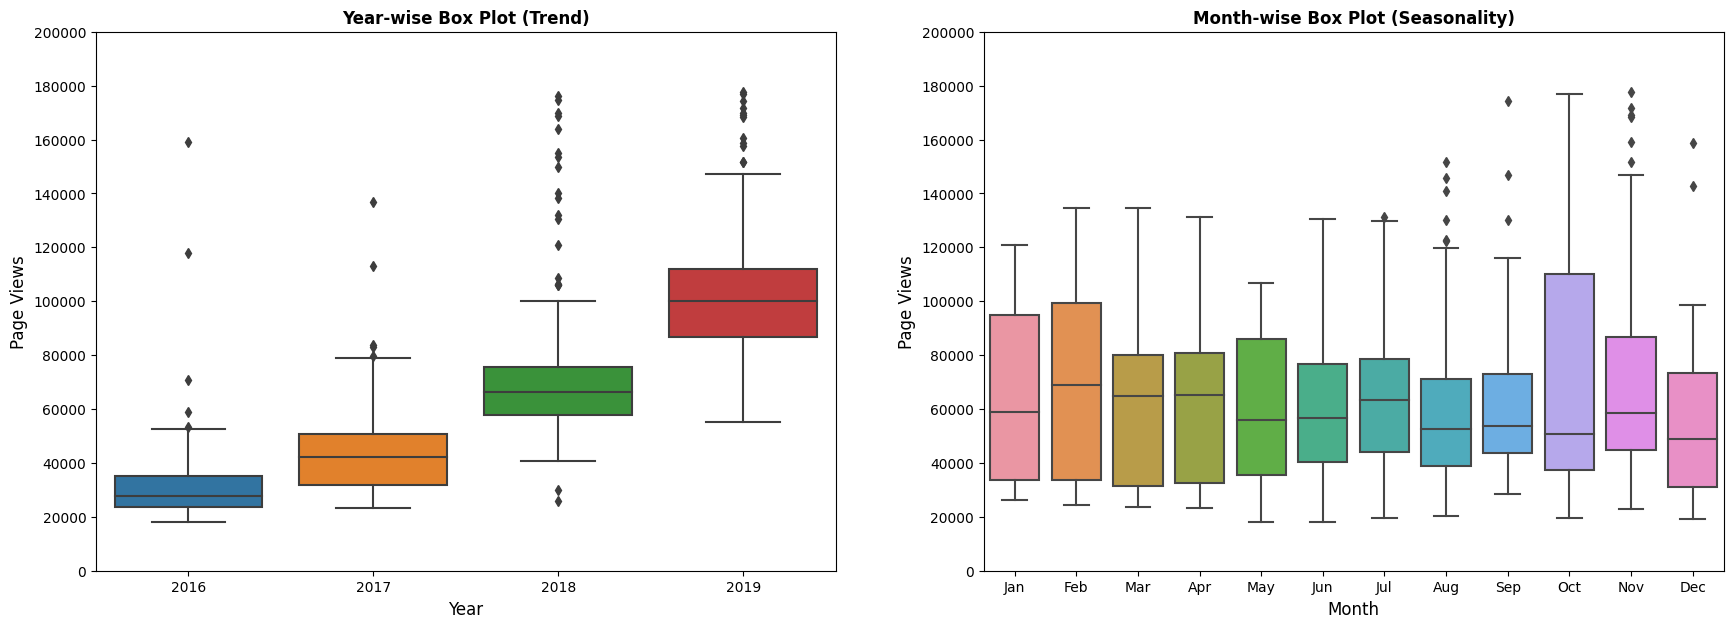

In [139]:
draw_box_plot()

## Results
Below there is an image that shows that all tets were succesfully completed.
![Image 4](Results_4.png)